In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
try:
    from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
except:
    print('wordcloud not installed; pip install wordcloud')

sns.set()
sdg_colors = ['#E5243B', '#DDA63A', '#4C9F38','#C5192D','#FF3A21','#26BDE2','#FCC30B','#A21942','#FD6925','#DD1367','#FD9D24','#BF8B2E','#3F7E44','#0A97D9','#56C02B','#00689D','#19486A']

In [2]:
#Preprocessing
df = pd.read_csv('data/allSDGtweets.csv', encoding='latin1')
df = df.drop(['Unnamed: 0', 'id','created_at','category'], axis=1)

In [3]:
df.head()

,text,lang,#sdg1,#sdg2,#sdg3,#sdg4,#sdg5,#sdg6,#sdg7,#sdg8,#sdg9,#sdg10,#sdg11,#sdg12,#sdg13,#sdg14,#sdg15,#sdg16,#sdg17,nclasses
0,"With 300 million people without #EnergyAccess,...",en,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,1
1,Happy new year 2019 to #Brussels #SDG11,en,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,1
2,Nearly 4 000 new followers joined us on social...,en,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,1
3,In 2019 Promoting @Najim_Ali five simple #Pas...,en,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,1
4,Please download the #Safecity Mobile app on An...,en,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,1


In [4]:
# Non-processed DataFrame
print(len(df))
print(len(df['text'].unique()))

# DataFrame containing English tweets only
en_df = df[df['lang'] == 'en']
print(len(en_df))
print(len(en_df['text'].unique()))



935241
801856
784441
670768


The DataFrame contains a lot of duplicates, lets remove those.

In [5]:
df = df.drop_duplicates('text')
en_df = en_df.drop_duplicates('text')

In [6]:
print(len(df), len(en_df))

801856 670768


Since we will only be working with the English tweets, it is the DataFrame we will proceed with.

## Number of tweets with $n$ labels

In [7]:
print(f"Number of english tweets:\t {len(en_df)} \t({np.round(len(en_df)/len(df)*100,2)}%)")
for i in range(18):
    print(f"Number of nclasses = {i} tweets:\t {len(en_df[en_df['nclasses'] == i])} \t({np.round(len(en_df[en_df['nclasses'] == i])/len(en_df)*100,2)}%)")

Number of english tweets:	 670768 	(83.65%)
Number of nclasses = 0 tweets:	 225985 	(33.69%)
Number of nclasses = 1 tweets:	 398080 	(59.35%)
Number of nclasses = 2 tweets:	 35283 	(5.26%)
Number of nclasses = 3 tweets:	 7709 	(1.15%)
Number of nclasses = 4 tweets:	 2036 	(0.3%)
Number of nclasses = 5 tweets:	 901 	(0.13%)
Number of nclasses = 6 tweets:	 413 	(0.06%)
Number of nclasses = 7 tweets:	 203 	(0.03%)
Number of nclasses = 8 tweets:	 64 	(0.01%)
Number of nclasses = 9 tweets:	 32 	(0.0%)
Number of nclasses = 10 tweets:	 15 	(0.0%)
Number of nclasses = 11 tweets:	 13 	(0.0%)
Number of nclasses = 12 tweets:	 7 	(0.0%)
Number of nclasses = 13 tweets:	 1 	(0.0%)
Number of nclasses = 14 tweets:	 1 	(0.0%)
Number of nclasses = 15 tweets:	 0 	(0.0%)
Number of nclasses = 16 tweets:	 8 	(0.0%)
Number of nclasses = 17 tweets:	 17 	(0.0%)


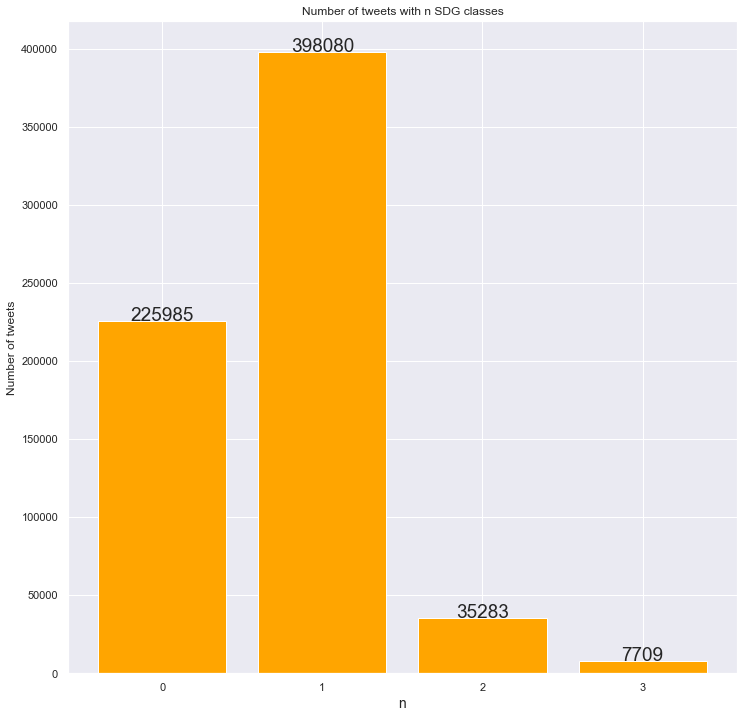

In [8]:
fig = plt.figure(figsize=(12,12))
x = [*range(4)]
y = [len(en_df[en_df['nclasses'] == i]) for i in x]
# print(x,y)
plt.bar(x, y, color='orange')
for xi, yi in zip(x, y):
    plt.text(xi,yi,yi,ha='center', fontsize=19)
plt.title("Number of tweets with n SDG classes")
plt.xticks(x,x)
plt.xlabel("n", fontsize=14)
plt.ylabel("Number of tweets")
plt.show()

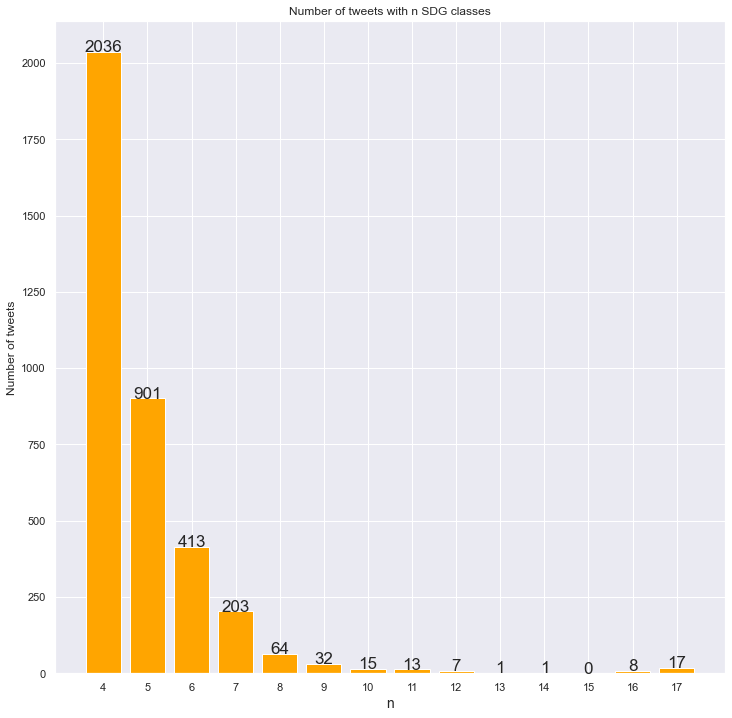

In [9]:
fig = plt.figure(figsize=(12,12))
x = [*range(4,18)]
y = [len(en_df[en_df['nclasses'] == i]) for i in x]
# print(x,y)
plt.bar(x, y, color='orange')
for xi, yi in zip(x, y):
    plt.text(xi,yi,yi,ha='center', fontsize=17)
plt.title("Number of tweets with n SDG classes")
plt.xticks(x,x)
plt.xlabel("n", fontsize=14)
plt.ylabel("Number of tweets")
plt.show()

## Tweet distribution

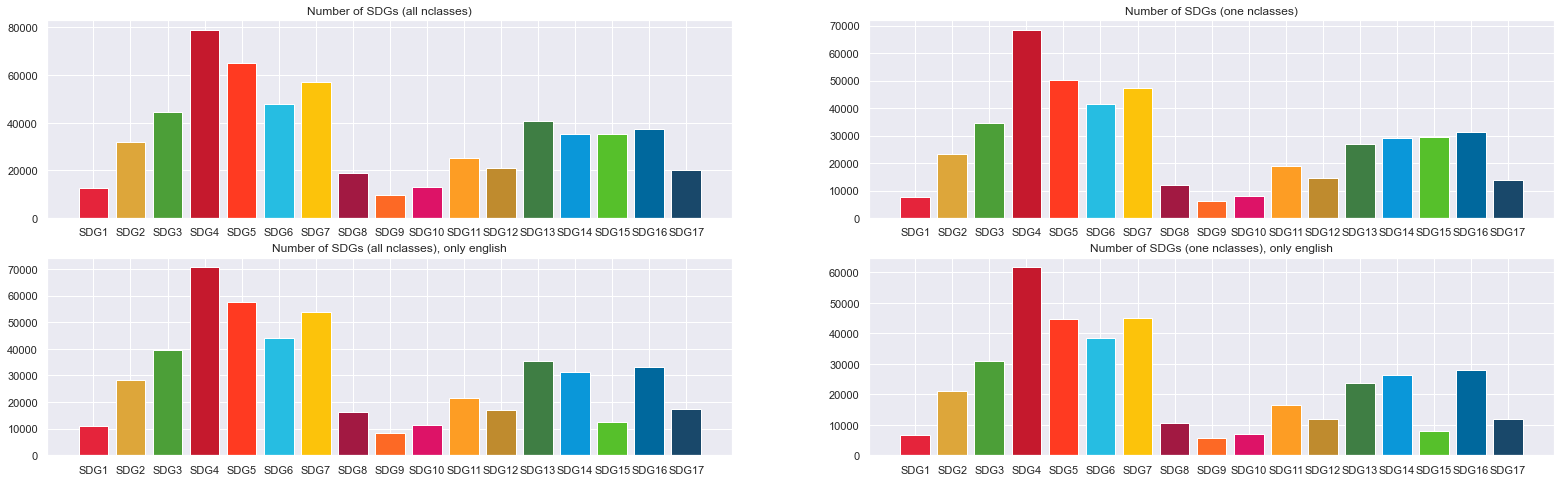

In [10]:
plt.figure(figsize=(27, 8))
plt.subplot(2,2,1)
plt.bar(range(1,18),[np.sum(df[f'#sdg{i}']) for i in range(1,18)], color=sdg_colors)
plt.xticks(range(1,18), [f'SDG{i}' for i in range(1,18)])
plt.title("Number of SDGs (all nclasses)")
plt.subplot(2,2,2)
plt.bar(range(1,18),[np.sum(df[df['nclasses'] == 1][f'#sdg{i}']) for i in range(1,18)], color=sdg_colors)
plt.xticks(range(1,18), [f'SDG{i}' for i in range(1,18)])
plt.title("Number of SDGs (one nclasses)")
plt.subplot(2,2,3)
plt.bar(range(1,18),[np.sum(en_df[f'#sdg{i}']) for i in range(1,18)], color=sdg_colors)
plt.xticks(range(1,18), [f'SDG{i}' for i in range(1,18)])
plt.title("Number of SDGs (all nclasses), only english")
plt.subplot(2,2,4)
plt.bar(range(1,18),[np.sum(en_df[en_df['nclasses'] == 1][f'#sdg{i}']) for i in range(1,18)], color=sdg_colors)
plt.xticks(range(1,18), [f'SDG{i}' for i in range(1,18)])
plt.title("Number of SDGs (one nclasses), only english")
plt.show()

In [11]:
x = np.array([np.sum(en_df[f'#sdg{i}']) for i in range(1,18)])

In [12]:
x[[0, 7,8,9,10,14]].sum()/x.sum()

0.1594965701981794

## Tweet length

In [13]:
text_length = np.zeros(17)
word_text_length = np.zeros(17)

for i in range(1,18):
    for text in en_df[en_df[f'#sdg{i}'] == True]['text']:
        text_length[i-1] += len(text)
        word_text_length[i-1] += len(text.split())

text_length = text_length/([np.sum(en_df[f'#sdg{i}']) for i in range(1,18)])
word_text_length = word_text_length/([np.sum(en_df[f'#sdg{i}']) for i in range(1,18)])

for i in range(17):
    print(f"Average text length for #SDG{i+1}: {np.round(text_length[i])} characters per tweet \t {np.round(word_text_length[i])} words per tweet")

Average text length for #SDG1: 220.0 characters per tweet 	 28.0 words per tweet
Average text length for #SDG2: 229.0 characters per tweet 	 29.0 words per tweet
Average text length for #SDG3: 229.0 characters per tweet 	 29.0 words per tweet
Average text length for #SDG4: 223.0 characters per tweet 	 27.0 words per tweet
Average text length for #SDG5: 225.0 characters per tweet 	 28.0 words per tweet
Average text length for #SDG6: 217.0 characters per tweet 	 28.0 words per tweet
Average text length for #SDG7: 239.0 characters per tweet 	 29.0 words per tweet
Average text length for #SDG8: 231.0 characters per tweet 	 29.0 words per tweet
Average text length for #SDG9: 226.0 characters per tweet 	 27.0 words per tweet
Average text length for #SDG10: 228.0 characters per tweet 	 28.0 words per tweet
Average text length for #SDG11: 230.0 characters per tweet 	 28.0 words per tweet
Average text length for #SDG12: 230.0 characters per tweet 	 29.0 words per tweet
Average text length for #

## Vocabulary

In [14]:
df_sub = en_df.loc[:, 'text']
texts = " ".join([text.lower() for text in df_sub])
search_pattern = r"(<(u\+)\w+>)|((#sdg)(\d+)?)|((http|ftp|https):\/\/([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:\/~+#-]*[\w@?^=%&\/~+#-]))|[\r\n]"
texts = re.sub(search_pattern, "", texts)

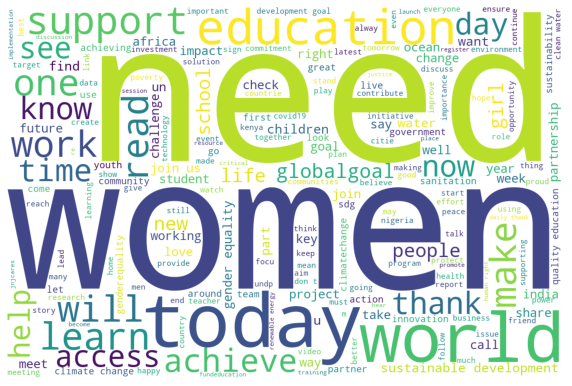

In [15]:
# Make a wordcloud for the English tweets and filter out certain words/character strings.

fig = plt.figure(figsize=(10,10))
stopwords = set(STOPWORDS)
stopwords.update(['s', 'amp'])
wordcloud = WordCloud(width=1080, height=720, stopwords=stopwords, background_color="white").generate(texts)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [16]:
wordcloud.words_

{'need': 1.0,
 'women': 0.9706965637268791,
 'today': 0.9569757558586636,
 'world': 0.8712510624519367,
 'education': 0.7637106892783422,
 'support': 0.6973732140688874,
 'learn': 0.6394544056340309,
 'one': 0.622900392601287,
 'work': 0.6132674950418909,
 'will': 0.6082082001052334,
 'read': 0.6040393410774274,
 'make': 0.5973205974015461,
 'achieve': 0.58954952037884,
 'time': 0.5482251993362205,
 'know': 0.5259238272554336,
 'thank': 0.5258833528959405,
 'day': 0.5030962885012344,
 'see': 0.4840328651799085,
 'access': 0.4826972113166309,
 'now': 0.48233294208119154,
 'help': 0.45829117254219454,
 'globalgoal': 0.45359614684097627,
 'girl': 0.4514510057878334,
 'people': 0.43327801837535923,
 'life': 0.432468531185494,
 'school': 0.42886631319059376,
 'new': 0.4240498644108957,
 'sustainable development': 0.4189500951147448,
 'u': 0.4133646335046748,
 'children': 0.41255514631480955,
 'find': 0.40526976160602257,
 'want': 0.40300319747439994,
 'water': 0.40154612053264255,
 'year': 

In [17]:
word_dict = {}
words = texts.split(" ")

In [18]:
for word in words:
    if word not in word_dict:
        word_dict[word] = 1
    else:
        word_dict[word] += 1

In [19]:
word_dict

{'with': 94674,
 '300': 362,
 'million': 10499,
 'people': 29273,
 'without': 7336,
 '#energyaccess,': 233,
 'distributed': 781,
 '#solar': 4122,
 'industry': 2437,
 'leaders': 6178,
 'see': 14243,
 '#india': 2669,
 'as': 44574,
 'the': 515622,
 'next': 8253,
 'pay-as-you-go': 93,
 'giant:': 4,
 '': 1251001,
 '#endenergypovertyfaster': 1480,
 '#payg': 179,
 'happy': 8706,
 'new': 35255,
 'year': 7412,
 '2019': 3608,
 'to': 479739,
 '#brussels': 76,
 'nearly': 1490,
 '4': 6662,
 '000': 206,
 'followers': 734,
 'joined': 1491,
 'us': 24981,
 'on': 155000,
 'social': 8857,
 'media': 2428,
 'in': 265705,
 '2018!': 110,
 'thank': 12161,
 'you,': 933,
 'and': 318066,
 'please': 5846,
 'remember': 1579,
 'tag,': 11,
 'like': 14439,
 'retweet': 1250,
 '.': 18584,
 '#newyear2019!': 1,
 '@unccd': 288,
 '#landdegradationneutrality': 78,
 '#slm': 59,
 'promoting': 3381,
 '@najim_ali': 8,
 'five': 1350,
 'simple': 1126,
 '#passive': 4,
 'methods:4th': 2,
 '#book"methods': 5,
 'save': 4099,
 'energy

In [23]:
del(word_dict[""])

In [24]:
word_dict = {k: v for k, v in sorted(word_dict.items(), key=lambda item: item[1])}

In [29]:
STOPWORDS

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [31]:
for word in STOPWORDS:
    if word in word_dict:
        del(word_dict[word])
    else:
        continue

In [40]:
for word in ['&amp;', "-", "s", "will"]:
    if word in word_dict:
        del(word_dict[word])
    else:
        continue

In [41]:
list(word_dict.items())[-20:]

[('health', 20740),
 ('work', 21067),
 ('via', 21272),
 ('energy', 21807),
 ('support', 22327),
 ('achieve', 22476),
 ('need', 22688),
 ('help', 23789),
 ('education', 24725),
 ('world', 24760),
 ('#globalgoals', 24813),
 ('us', 24981),
 ('access', 26104),
 ('join', 26135),
 ('water', 26937),
 ('global', 27529),
 ('women', 27531),
 ('sustainable', 28551),
 ('people', 29273),
 ('new', 35255)]

# Scopus

In [20]:
s_df = pd.read_csv('data/scopus_ready_to_use.csv')

In [21]:
s_df.head()

,Unnamed: 0,Title,Year,Link,Abstract,Author.Keywords,Index.Keywords,EID,text,sdg1,...,sdg9,sdg10,sdg11,sdg12,sdg13,sdg14,sdg15,sdg16,sdg17,nclasses
0,1,Counting the Costs: A Method for Evaluating th...,2020,https://www.scopus.com/inward/record.uri?eid=2...,"As we enter the decade of action on the SDGs, ...",agenda 2030; costing; goal 11; hard costs; inf...,NaN,2-s2.0-85107828156,Counting the Costs: A Method for Evaluating th...,False,...,False,False,True,False,False,False,False,False,False,1
1,2,Water research in support of the Sustainable D...,2020,https://www.scopus.com/inward/record.uri?eid=2...,Reaching the Sustainable Development Goal (SDG...,Belgium; Bibliometrics; Global South; North-So...,Climate change; Environmental protection; Plan...,2-s2.0-85090699582,Water research in support of the Sustainable D...,False,...,False,False,False,False,False,False,False,False,False,1
2,3,Global & geographical mapping and visualizatio...,2020,https://www.scopus.com/inward/record.uri?eid=2...,This paper presents a new knowledge base creat...,Actuation; AI; Big Data; Biographical Data; Cy...,Blood; Blood pressure; Health; Health risks; I...,2-s2.0-85099263145,Global & geographical mapping and visualizatio...,False,...,False,False,False,False,False,False,False,False,False,1
3,4,Learning from sustainability practice: case ex...,2020,https://www.scopus.com/inward/record.uri?eid=2...,Purpose: The purpose of this paper is to ident...,Hotels; Integrated social responsibility; Sust...,NaN,2-s2.0-85089153318,Learning from sustainability practice: case ex...,False,...,False,True,False,False,False,False,False,False,False,2
4,5,"Measuring What Matters, Where It Matters: A Sp...",2020,https://www.scopus.com/inward/record.uri?eid=2...,The Urban Environment and Social Inclusion Ind...,cities; equity; indices; new urban agenda; soc...,NaN,2-s2.0-85123219889,"Measuring What Matters, Where It Matters: A Sp...",False,...,False,False,True,False,False,False,False,False,False,1


In [46]:
scopus = [text.split(" ") for text in s_df['Abstract']]

In [47]:
np.mean([len(text) for text in scopus])

240.37364735837048

In [51]:
s_df.drop_duplicates("text")

,Unnamed: 0,Title,Year,Link,Abstract,Author.Keywords,Index.Keywords,EID,text,sdg1,...,sdg9,sdg10,sdg11,sdg12,sdg13,sdg14,sdg15,sdg16,sdg17,nclasses
0,1,Counting the Costs: A Method for Evaluating th...,2020,https://www.scopus.com/inward/record.uri?eid=2...,"As we enter the decade of action on the SDGs, ...",agenda 2030; costing; goal 11; hard costs; inf...,NaN,2-s2.0-85107828156,Counting the Costs: A Method for Evaluating th...,False,...,False,False,True,False,False,False,False,False,False,1
1,2,Water research in support of the Sustainable D...,2020,https://www.scopus.com/inward/record.uri?eid=2...,Reaching the Sustainable Development Goal (SDG...,Belgium; Bibliometrics; Global South; North-So...,Climate change; Environmental protection; Plan...,2-s2.0-85090699582,Water research in support of the Sustainable D...,False,...,False,False,False,False,False,False,False,False,False,1
2,3,Global & geographical mapping and visualizatio...,2020,https://www.scopus.com/inward/record.uri?eid=2...,This paper presents a new knowledge base creat...,Actuation; AI; Big Data; Biographical Data; Cy...,Blood; Blood pressure; Health; Health risks; I...,2-s2.0-85099263145,Global & geographical mapping and visualizatio...,False,...,False,False,False,False,False,False,False,False,False,1
3,4,Learning from sustainability practice: case ex...,2020,https://www.scopus.com/inward/record.uri?eid=2...,Purpose: The purpose of this paper is to ident...,Hotels; Integrated social responsibility; Sust...,NaN,2-s2.0-85089153318,Learning from sustainability practice: case ex...,False,...,False,True,False,False,False,False,False,False,False,2
4,5,"Measuring What Matters, Where It Matters: A Sp...",2020,https://www.scopus.com/inward/record.uri?eid=2...,The Urban Environment and Social Inclusion Ind...,cities; equity; indices; new urban agenda; soc...,NaN,2-s2.0-85123219889,"Measuring What Matters, Where It Matters: A Sp...",False,...,False,False,True,False,False,False,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,3210,Women’s empowerment in the period of the rapid...,2021,https://www.scopus.com/inward/record.uri?eid=2...,Turkey has experienced an expansion in its hig...,Gender inequality in the labour market; Gender...,NaN,2-s2.0-85087930768,Women’s empowerment in the period of the rapid...,False,...,False,False,False,False,False,False,False,False,False,1
3138,3211,United Nation’s sustainable development goals:...,2021,https://www.scopus.com/inward/record.uri?eid=2...,In order to achieve the United Nations (UN) su...,Australia; baseline; building sector; LEED; su...,Architectural design; Climate change; Planning...,2-s2.0-85087456408,United Nation’s sustainable development goals:...,False,...,False,False,False,True,True,False,True,False,False,5
3139,3212,Towards nexus-based governance: defining inter...,2021,https://www.scopus.com/inward/record.uri?eid=2...,The success of the Sustainable Development Goa...,2030 Agenda; Economic activities; Interlinkage...,economic activity; governance approach; indust...,2-s2.0-85086039445,Towards nexus-based governance: defining inter...,False,...,True,False,False,False,True,False,False,False,False,4
3140,3213,Rewiring higher education for the Sustainable ...,2021,https://www.scopus.com/inward/record.uri?eid=2...,In the framework of the Sustainable Developmen...,Community engagement; Indigenous education; In...,NaN,2-s2.0-85082708956,Rewiring higher education for the Sustainable ...,False,...,False,False,False,False,False,False,False,False,False,1


In [50]:
s_df['Abstract'].apply(len)

0       2241
1       2009
2       1714
3       1326
4       1728
        ... 
3137    1325
3138    1547
3139    1877
3140    1447
3141    1298
Name: Abstract, Length: 3142, dtype: int64

## Scopus distribution

In [63]:
s_df = s_df.drop(columns=["Unnamed: 0"])

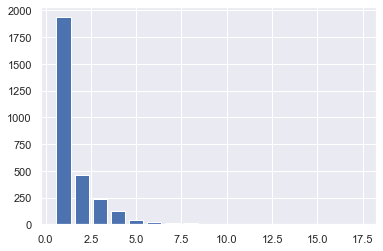

In [66]:
plt.bar(range(1,18), [len(s_df[s_df['nclasses'] == i]) for i in range(1, 18)])
plt.show()